In [1]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [87]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\ALDH4"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\ALDH4"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2i_TP.tsv")
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\ALDH4\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\ALDH4\myRData"


qualCols = ['Group', 'Ig', 'Control']
quanCols = []

In [6]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col='Seqn')

In [7]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [230]:
#
# Run MOFA
#

# Create data matrix object (without separating by groups)

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

# g = ['A12', 'B1-8', 'PBS']
# data_mat = [
#     [xqi.loc[g2s[i],:].to_numpy() for i in g],
#     [xmi.loc[g2s[i],:].to_numpy() for i in g]
# ]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    features_names=[xqi.columns, xmi.columns],
    samples_names=[[str(i) for i in seqn]],
    # samples_names=[g2s[i] for i in g],
    likelihoods=['gaussian', 'gaussian'],
    # groups_names=g
)

ent.set_model_options(
    factors = min(xq.join(xm, how='inner').shape[0], xq.shape[1]+xm.shape[1]), 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_weights = True,
    ard_factors=True
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Successfully loaded view='q' group='A12' with N=6 samples and D=4118 features...
Successfully loaded view='q' group='B1-8' with N=5 samples and D=4118 features...
Successfully loaded view='q' group='PBS' with N=5 samples and D=4118 features...
Successfully loaded view='m' group='A12' with N=6 samples and D=2935 features...
Successfully loaded view='m' group='B1-8' with N=5 sampl

In [231]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy.hdf5')





######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -1629987.75 

Iteration 1: time=1.82, ELBO=-362730.66, deltaELBO=1267257.084 (77.74641786%), Factors=15
Iteration 2: time=2.24, ELBO=-319111.78, deltaELBO=43618.878 (2.67602488%), Factors=14
Iteration 3: time=1.38, ELBO=-302495.98, deltaELBO=16615.801 (1.01938195%), Factors=13
Iteration 4: time=0.86, ELBO=-295283.48, deltaELBO=7212.499 (0.44248796%), Factors=12
Iteration 5: time=0.56, ELBO=-290730.87, deltaELBO=4552.613 (0.27930348%), Factors=11
Iteration 6: time=0.64, ELBO=-287214.41, deltaELBO=3516.459 (0.21573531%), Factors=10
Iteration 7: time=0.60, ELBO=-284224.90, deltaELBO=2989.508 (0.18340680%), Factors=9
Iteration 8: time=0.74, ELBO=-281417.39, deltaELBO=2807.518 (0.17224163%), Factors=8
Iteration 9: time=0.42, ELBO=-281139.34, deltaELBO=278.048 (0.01705827%), Factors=8
Iteration 10: time=0.75, ELBO=-280935.08, deltaELBO=204.254 (0.0125

In [15]:
m = mfx.mofa_model('modelpy.hdf5')

In [16]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 16
Features: 7053
Groups of observations: group0
Views: q, m



In [17]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [20]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,11.263512,16.698046
Factor2,0.194309,21.720463
Factor3,13.445686,7.477928
Factor4,15.602356,5.199477
Factor5,19.300695,0.006339
Factor6,3.657033,13.006236
Factor7,1.926479,6.243101
Factor8,1.850828,5.822691


In [21]:
import plotly.express as px
palette = px.colors.qualitative.Plotly

Global Analysis of MOFA

In [22]:
# Variance explained by factors
import re

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')

explVar = explVar.loc[[
    f'Factor{j}'
    for j in 
    np.sort([int(re.search('([0-9]+)', i).groups()[0]) for i in explVar.index])
]]

explVar

View,m,q
Factor,,
Factor1,11.263512,16.698046
Factor2,0.194309,21.720463
Factor3,13.445686,7.477928
Factor4,15.602356,5.199477
Factor5,19.300695,0.006339
Factor6,3.657033,13.006236
Factor7,1.926479,6.243101
Factor8,1.850828,5.822691


In [96]:
#
# Correlation Analysis between Projections and metadata
#

import statsmodels.api as sm
from statsmodels.formula.api import ols


pv = {}
model = {}

for n, nfactor in enumerate(m.get_factors().T):

    pv[n] = {}
    model[n] = {}

    for mdatacol in quanCols:

        # model[n][mdatacol] = sm.OLS(
        #     mdatai[mdatacol],
        #     sm.add_constant(nfactor)
        # ).fit()
        model[n][mdatacol] = sm.OLS(
            nfactor,
            sm.add_constant(mdatai[mdatacol])
        ).fit()

        pv[n][mdatacol] = model[n][mdatacol].pvalues[-1]
    
    for mdatacol in qualCols:
        model[n][mdatacol] = ols(
            'y ~ C(x)', 
            pd.DataFrame({
                'y': nfactor,
                'x': mdatai.loc[:, mdatacol]
            })
        ).fit()

        pv[n][mdatacol] = sm.stats.anova_lm(model[n][mdatacol])['PR(>F)']['C(x)']

pv = pd.DataFrame(pv)
pv.columns = explVar.index
pd.concat([
    explVar.T.round(3),
    pv
])

from statsmodels.stats.multitest import multipletests

pvfdr = pv.T.copy()
for i in pv.T.columns:
    #pvfdr[i] = multipletests(pvfdr[i], method='fdr_bh')[1]
    pass

pd.concat([
    explVar.T,#.round(3),
    pvfdr.T
]).T#.round(4)

,m,q,Group,Ig,Control
Factor,,,,,
Factor1,11.263512,16.698046,0.203318,0.758079,0.187305
Factor2,0.194309,21.720463,0.924269,0.776453,0.693687
Factor3,13.445686,7.477928,0.778966,0.833311,0.635687
Factor4,15.602356,5.199477,0.073905,0.424996,0.022103
Factor5,19.300695,0.006339,0.902587,0.765401,0.886231
Factor6,3.657033,13.006236,0.028712,0.008994,0.070996
Factor7,1.926479,6.243101,0.713487,0.548912,0.858345
Factor8,1.850828,5.822691,0.079164,0.782351,0.087065


In [93]:
pv

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
Group,0.203318,0.924269,0.778966,0.073905,0.902587,0.028712,0.713487,0.079164
Ig,0.758079,0.776453,0.833311,0.424996,0.765401,0.008994,0.548912,0.782351
Control,0.187305,0.693687,0.635687,0.022103,0.886231,0.070996,0.858345,0.087065


In [46]:
proj = pd.DataFrame(m.get_factors(),index=mdatai.index).join(mdatai)
proj = {i:j for i,j in proj.groupby('Group')}

In [107]:
n = 7

fig = go.Figure()

for i in ['PBS', 'B1-8', 'A12']:#proj:
    fig.add_trace(go.Scatter(
        x = len(proj[i][n])*[i],
        y= proj[i][n],
        mode='markers', name=i
    ))


fig.update_layout(title=f'Factor {n+1} | m: {round(explVar["m"][n], 2)}% | q: {round(explVar["q"][n], 2)}%', width=500)
fig.show()

from scipy.stats import tukey_hsd
#n= 4

ph = {i:proj[i][n].values for i in ['PBS', 'B1-8', 'A12']}

print(ph.keys())
print(tukey_hsd(*list(ph.values())))

dict_keys(['PBS', 'B1-8', 'A12'])
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.188     0.293    -0.128     0.504
 (0 - 2)     -0.095     0.692    -0.397     0.207
 (1 - 0)     -0.188     0.293    -0.504     0.128
 (1 - 2)     -0.283     0.068    -0.585     0.020
 (2 - 0)      0.095     0.692    -0.207     0.397
 (2 - 1)      0.283     0.068    -0.020     0.585



In [91]:
coefs = pd.DataFrame({i: {j: model[i][j].params[1] for j in model[i]} for i in model})#, columns=explVar.index)
coefs.columns = explVar.index
coefs

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
Group,-0.641283,-0.115045,0.280712,-0.679797,-0.053142,0.137405,-0.093465,-0.282838
Ig,-0.104181,0.101269,0.077099,0.243652,-0.040274,-0.489483,-0.086390,-0.033561
Control,-0.414297,-0.134304,0.165605,-0.616224,-0.018512,0.344672,-0.024779,-0.188920


Factor Analysis

In [220]:
top = 50
col = 'Factor4'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-2,2), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-2,2), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    #fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

In [ ]:
lfc = xmi.copy()#loc[:, basex_sort.index[gboolean]]

g2s = {i:j.index for i,j in mdatai.groupby('Group')}
lfc = lfc.loc[g2s['A12'], :].mean()-lfc.loc[g2s['B1-8'], :].mean()


L = 'TG'
n=3

basex_sort = lfc.sort_values(ascending=False)
gboolean = [L in i.split(' | ') if type(i)==str else False for i in m2i.set_index('fid').loc[basex_sort.index]['TP_Class_argmax']]

plotGSEA(basex_sort, gboolean)

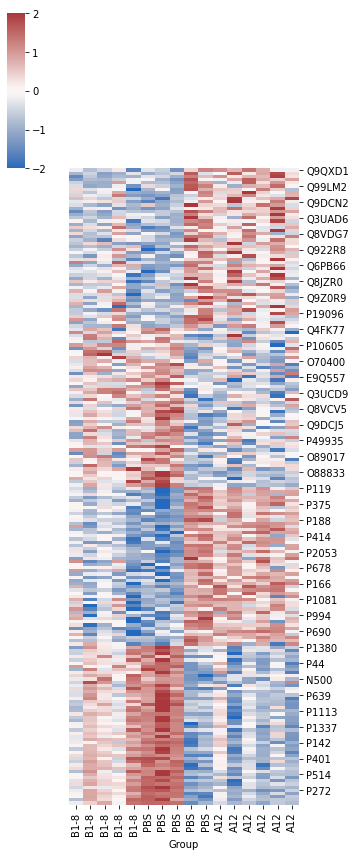

In [224]:
# HEATMAP

#prots = ['P27169','P80108','P02647','P02652']
nqup=50
nqdo=50
nmup=50
nmdo=50

tmp = xqi.loc[
    :,
    #table.index
    w_all['q'][:nqup].index.tolist()+w_all['q'][-nqdo:].index.tolist()
    #['P00738', 'P05546']
    #['B9A064','P0CG05', 'P01859', 'S6BAR0', 'S6BGF5', 'P01857', 'P01605']
    #['P05546', 'P04114']
    ].join(
    xmi.loc[
        :, 
        w_all['m'][:nmup].index.tolist()+w_all['m'][-nmdo:].index.tolist()
        #['HILP688', 'HILP675']
        # ['HILP795', 'HILP771', 'HILP793', 'HILP840', 'HILP838',
        #'HILP779', 'HILP688', 'HILP675']
        # 'HILP688', 'HILP675', 'HILP779']
        ]
    ).T

tmp.columns = mdatai.loc[tmp.columns].Group

hmap = sns.clustermap(
    tmp.loc[:, ['B1-8', 'PBS', 'A12']],
    cmap='vlag', figsize=(5,12), center=0, row_cluster=False, col_cluster=False, vmin=-2, vmax=2)

In [121]:
w_all['m']
wm

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
P1,0.057413,-0.000099,-0.376984,1.142019,-1.367311,-0.069108,-0.037872,0.111357
P2,-0.339931,-0.022560,0.038898,0.099735,1.657270,-0.050369,-0.020361,-0.057007
P3,-0.985176,0.003622,-0.039642,-0.711703,0.099083,0.005515,0.128467,0.314020
P4,0.534674,-0.001825,-0.489900,-0.680288,-0.207045,0.084982,0.242961,0.780203
P6,-0.105879,0.000571,-0.088005,-0.505048,-1.000275,-0.139692,0.288977,0.584120
...,...,...,...,...,...,...,...,...
N1146,-0.202418,0.009633,-1.119641,0.374554,-1.396526,-0.038989,0.007317,0.125375
N1149,-0.210989,0.005908,-1.179821,0.024091,-0.335650,0.438853,-0.020384,0.355914
N1157,0.066240,-0.009884,-1.308824,0.523619,0.617065,-0.024849,-0.313708,0.706863
N1163,0.281822,0.001282,-1.144216,0.474770,-0.711935,0.029859,-0.106871,0.490205


In [145]:
# GSEA

def GSEA(basex_sort, gboolean):
    # https://www.pathwaycommons.org/guide/primers/data_analysis/gsea/#:~:text=The%20GSEA%20enrichment%20score%20(S,sets%20one%20at%20a%20time.
    gsea = pd.DataFrame({
        'group': gboolean
    })
    gsea['gint'] = gsea.group.astype(int)
    gsea['ngint'] = (~gsea.group).astype(int)
    gsea['coef'] = basex_sort.values
    gsea['coefA'] = gsea.coef.abs()
    gsea['Sg'] = gsea.coefA*gsea.gint
    gsea['Fg'] = gsea.Sg.cumsum()/gsea.Sg.sum()
    gsea['Fng'] = gsea.ngint.cumsum()/gsea.ngint.sum()
    gsea['ES'] = gsea.Fg-gsea.Fng
    
    return gsea


def plotGSEA(basex_sort, gboolean):

    gsea = GSEA(basex_sort, gboolean)
    # Calculate empirical pvalue
    rbool = np.array(gboolean.copy())

    ES_null = []
    null = 1000

    for n in range(null):
        np.random.shuffle(rbool)
        ES_null.append(GSEA(basex_sort, rbool.tolist()).ES.max())

    ES_null = np.array(ES_null)
    pvalue = (ES_null>gsea.ES.abs().max()).sum()/null
    pvalue = f"pvalue = {round(pvalue,5)}" if pvalue>0 else f"pvalue < {1/null}"
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    fig = make_subplots(rows=4,cols=1, row_heights=[0.5,0.1, 0.1, 0.2], vertical_spacing=0.03)

    fig.add_trace(go.Scatter(
        y=gsea.ES, showlegend=False
    ), row=1, col=1)

    [fig.add_trace(go.Scatter(
        x=[n,n], y=[0,1], line_color='black', mode='lines', line_width=0.4,showlegend=False
    ), row=2,col=1) for n,i in enumerate(gsea.gint) if i==1]

    fig.add_trace(go.Heatmap(
        z=gsea.coef,
        y=['']*gsea.shape[0],
        x=gsea.index, colorscale='RdBu_r'
    ), row=3,col=1)

    fig.add_trace(go.Scatter(
        y=gsea.coef, line_color='black', line_width=0.7, showlegend=False
    ), row=4, col=1)

    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False, row=2,col=1)
    fig.update_layout(height=700, width=1000, title=f'GSEA | ES = {np.sign(gsea.ES.max()+gsea.ES.min())*round(gsea.ES.abs().max(), 3)} | {pvalue} ')
    fig.show()

In [147]:
L = 'TG'
n=3

basex_sort = wm.sort_values('Factor'+str(n+1), ascending=False)['Factor'+str(n+1)]
gboolean = [L in i.split(' | ') if type(i)==str else False for i in m2i.set_index('fid').loc[basex_sort.index]['TP_Class_argmax']]

plotGSEA(basex_sort, gboolean)

In [217]:
lfc = xmi.copy()#loc[:, basex_sort.index[gboolean]]

g2s = {i:j.index for i,j in mdatai.groupby('Group')}
lfc = lfc.loc[g2s['A12'], :].mean()-lfc.loc[g2s['B1-8'], :].mean()


L = 'TG'
n=3

basex_sort = lfc.sort_values(ascending=False)
gboolean = [L in i.split(' | ') if type(i)==str else False for i in m2i.set_index('fid').loc[basex_sort.index]['TP_Class_argmax']]

plotGSEA(basex_sort, gboolean)

In [207]:
qset = '''
Q9QXD1
Q9D2R0
Q3UVJ7
I7DM66
Q9DCN2
Q3USD5
Q543J4
Q9QYF1
Q8VDG7
Q9EP69
Q920E5
E9Q4Z2
P55096
Q9WU19
Q8JZR0
Q920L1
Q9EPL9
Q9Z0R9
P19096
O88822
'''.strip().split('\n')

array([False, False, False, ..., False, False, False])

In [218]:
lfc = xqi.copy()#loc[:, basex_sort.index[gboolean]]

g2s = {i:j.index for i,j in mdatai.groupby('Group')}
lfc = lfc.loc[g2s['A12'], :].mean()-lfc.loc[g2s['B1-8'], :].mean()


basex_sort = lfc.sort_values(ascending=False)
gboolean = np.isin(basex_sort.index, qset).tolist()

plotGSEA(basex_sort, gboolean)

In [184]:
from scipy.stats import ttest_ind

t = ttest_ind(
    xmi.loc[g2s['A12']],
    xmi.loc[g2s['B1-8']]
)

t = pd.DataFrame({
    't': t.statistic,
    'p': t.pvalue,
    'fdr': multipletests(t.pvalue, method='fdr_bh')[1]
}, index=xmi.columns).join(m2i.set_index('fid'))

# m2i
# xmi

In [202]:
gbool = np.array(['TG' in i.split(' | ') if type(i)==str else False for i in t['TP_Class_argmax']])

print(f'Total TG: {gbool.sum()}')

print(f'''Total TG sig: {
np.logical_and.reduce([
    gbool, t.fdr<0.1
]).sum()
}''')

print(f'''Total TG sig: {
np.logical_and.reduce([
    gbool, t.fdr<0.1, t.t<0
]).sum()
}''')

Total TG: 278
Total TG sig: 2
Total TG sig: 2


In [83]:
# Export table with factors

q2i.set_index('fid').join(wq, how='inner').to_csv('Tables/qFactors.tsv', sep='\t')
m2i.set_index('fid').join(wm, how='inner').to_csv('Tables/mFactors.tsv', sep='\t')

In [23]:
wm.Factor2.to_numpy()[wm.Factor2.to_numpy().argsort()[-10:]]
wm.Factor2.to_numpy()[(-wm.Factor2.to_numpy()).argsort()[-10:]]

np.concatenate(
[wm.Factor2.to_numpy().argsort()[-10:],
(-wm.Factor2.to_numpy()).argsort()[-10:]]
)

array([1340,   60,  504, 1444, 1216,  727, 1373,  742, 1245, 1362, 1367,
       1431, 1433,  789, 1387,  785, 1369, 1365,  759, 1389], dtype=int64)

In [24]:
m2i

,fid,Name,Apex m/z,RT [min],Platform,Mode,TP_ID,Peptide,Halogenated,Plant,NaturalProduct,MDM,Drug,Food,TP_Adduct,TP_Class_argmax,TPMetrics,MODE
0,C18N1,A0641,132.029840,0.400000,C18N,NEG,deoxy-(lysino)-fructose // Aspartate | Iminodi...,|,|,|,| NP,|,| Drug,|,M-H | M-H,|,0.0 | 0.0,NaN
1,C18N2,A0646,135.029670,0.404000,C18N,NEG,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,NaN
2,C18N3,A0648,649.120410,0.407000,C18N,NEG,{[bis(dihydroxyphenyl)-hydroxy-oxo-dioxatricyc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M+Na-2H,NaN,8.776906255397188,NaN
3,C18N4,A0656,212.001980,0.411000,C18N,NEG,Indoxyl sulfate | Carmustine,|,| x,|,|,|,| Drug,| Food,M-H | M-H,|,0.0 | 0.0,NaN
4,C18N5,A0658,215.066800,0.412000,C18N,NEG,Hydroxyalanylclavam | Thiodianiline,|,|,|,|,|,|,|,M-H | M-H,|,0.0 | 0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,HILP2039,AH_2655,932.144473,3.693681,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6063,HILP2040,AH_2656,947.658866,2.283257,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6064,HILP2041,AH_2657,956.316894,4.040705,HILIC,NaN,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,POS
6065,HILP2042,AH_2658,958.313924,4.043271,HILIC,NaN,Pentaglutamyl folate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M+H,NaN,0.0,POS


In [149]:

m2i.set_index('fid').loc[wm.index[np.abs(wm.Factor2.to_numpy()).argsort()[:20]], ['TP_ID']]

m2i.set_index('fid').join(
    wm.iloc[
        np.concatenate([
            wm.Factor2.to_numpy().argsort()[-15:],
            (-wm.Factor2.to_numpy()).argsort()[-15:]
        ])][['Factor2']],
    how='inner'
    ).loc[:, :].sort_values('Factor2', ascending=False).to_excel('Tables/Summary/m_factor2.xlsx')

In [211]:
table = q2i.set_index('fid').join(
    wq.iloc[np.abs(wq.Factor2.to_numpy()).argsort()[-60:]][['Factor2']],
    how='inner'
).sort_values('Factor2', ascending=False)

In [212]:
table

,qdesc,Np,Factor2
E9KL26,>tr|E9KL26|E9KL26_HUMAN Epididymis tissue prot...,31,0.697156
P05546,>sp|P05546|HEP2_HUMAN Heparin cofactor 2 OS=Ho...,29,0.661651
P01008,>sp|P01008|ANT3_HUMAN Antithrombin-III OS=Homo...,55,0.651082
P29622,>sp|P29622|KAIN_HUMAN Kallistatin OS=Homo sapi...,21,0.624876
P01031,>sp|P01031|CO5_HUMAN Complement C5 OS=Homo sap...,88,0.620801
P08185,>sp|P08185|CBG_HUMAN Corticosteroid-binding gl...,12,0.584812
P04114,>sp|P04114|APOB_HUMAN Apolipoprotein B-100 OS=...,328,0.581594
P35858,>sp|P35858|ALS_HUMAN Insulin-like growth facto...,19,0.578883
P06681,>sp|P06681|CO2_HUMAN Complement C2 OS=Homo sap...,32,0.576341
Q8TAQ9,>sp|Q8TAQ9|SUN3_HUMAN SUN domain-containing pr...,1,0.564114


In [225]:
table.to_excel('Tables/Summary/q_factor2.xlsx')

In [38]:
xq[['Q13790','P04114']].corr(method='pearson')
#np.corrcoef(xq.P05090, xq.P02649)

,Q13790,P04114
Q13790,1.000000,0.124677
P04114,0.124677,1.000000


In [85]:

zz1 = m2i.set_index('fid').loc[w_all['m'][-nmdo:].index]#[['ID', 'Abbrev', 'TP_ID']]
zz1.to_csv(f'Tables/{col}_m_down.tsv', sep='\t')

zz2 = m2i.set_index('fid').loc[w_all['m'][:nmup].index]#[['ID', 'Abbrev', 'TP_ID']]
zz2.to_csv(f'Tables/{col}_m_up.tsv', sep='\t')

zz3 = q2i.set_index('fid').loc[w_all['q'][-nqdo:].index]
zz3.to_csv(f'Tables/{col}_q_down.tsv', sep='\t')

zz4 = q2i.set_index('fid').loc[w_all['q'][:nqup].index]
zz4.to_csv(f'Tables/{col}_q_up.tsv', sep='\t')

In [360]:
tmp = mdatai.loc[mdatai.index[hmap.dendrogram_col.reordered_ind], 'Plaque_thickness']
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=[str(i) for i in tmp.index],
    y=tmp, mode='markers'
))

In [709]:
mdatacol = qualCols[1]

# fig = go.Figure()

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==0).sum()*['Control'],
#     y=m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

# fig.add_trace(go.Violin(
#     x=(mdatai[mdatacol]==1).sum()*['Disease'],
#     y=m.get_factors()[mdatai[mdatacol]==1,nfactor-1],
#     box_visible=True, points="all", showlegend=False
# ))

import plotly.figure_factory as ff

hist_data = [
    m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
    m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
]

group_labels = ['Control', 'Disease']
colors = [palette[0], palette[1]]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, curve_type='kde')

# Add title
fig.update_xaxes(range=(-2.5,2.5))
fig.update_layout(title_text=f'{col} distribution per {mdatacol}')
fig.show()

#
# Violin Plot
#

# fig = go.Figure()
# data = [
#     m.get_factors()[mdatai[mdatacol]==0,nfactor-1],
#     m.get_factors()[mdatai[mdatacol]==1,nfactor-1]
# ]
# # for data_line, color in zip(data, palette[:2]):

# fig.add_trace(go.Violin(x=data[0], line_color=palette[0], opacity=0.5, name='Control'))
# fig.add_trace(go.Violin(x=data[1], line_color=palette[1], opacity=1, name='Disease'))

# fig.update_traces(orientation='h', side='positive', width=100, points=False)
# fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, title=f'{col} distribution per {mdatacol}')
#fig.update_xaxes(range=(-2.2,2.2))
# fig.show()
# # m.get_factors()[mdatai['Caso/control']==0,nfactor-1]


In [711]:
nfactor = 6

fig = go.Figure()

for mdatacol in quanCols:

    fig.add_trace(go.Scatter(
        x=m.get_factors()[:,nfactor-1],
        y=mdatai[mdatacol],
        name=mdatacol, mode='markers', marker_size=2.5
    ))

fig.show()

mdatacol = 'LDL'
fig = px.scatter(
    pd.DataFrame({mdatacol: mdatai[mdatacol], f'Factor {nfactor}': m.get_factors()[:,nfactor-1]}),
    x=f'Factor {nfactor}', y=mdatacol, trendline='ols'
    )

fig.show()

STRING FUNCTIONS

In [133]:
from STRING import Uniprot2String, FunctionalEnrichment

In [152]:
xq.columns

Index(['P04114', 'V9HWA9', 'P02768', 'P0C0L4', 'P01023', 'P02751', 'P02787',
       'P08603', 'P01031', 'P02671',
       ...
       'Q8IZD7', 'Q8N355', 'Q9UL77', 'P01602', 'P01743', 'P01764', 'H0Y509',
       'Q1KLZ0', 'Q6PIQ7', 'S4R460'],
      dtype='object', length=470)

In [220]:
background = Uniprot2String(
    q2i['fid'].tolist()
    #xq.columns.tolist()
)

background = [i[1] for i in background]

In [221]:
my_genes = Uniprot2String(
    table.index
    #w_all['q'].index.tolist()[:20]+w_all['q'].index.tolist()[-20:]
)
my_genes = [i[1] for i in my_genes]

In [222]:
data = FunctionalEnrichment(my_genes, background, species=9606)

from io import StringIO

data = pd.read_csv(
    StringIO(data),
    sep='\t'
)

In [223]:
col = ['category', 'number_of_genes', 'number_of_genes_in_background', 'fdr', 'description']
categories = ['Process', 'KEGG', 'Component']
data[np.isin(data['category'], categories)].sort_values('fdr').loc[:, col].head(15)

,category,number_of_genes,number_of_genes_in_background,fdr,description
67,Component,31,1021,3.140000e-13,Extracellular space
68,Component,28,759,7.050000e-13,Extracellular exosome
117,KEGG,13,63,1.910000e-12,Complement and coagulation cascades
69,Component,14,93,6.800000e-12,Blood microparticle
23,Process,13,115,3.930000e-08,Negative regulation of proteolysis
24,Process,13,134,1.190000e-07,Negative regulation of hydrolase activity
25,Process,9,43,3.820000e-07,Regulation of humoral immune response
26,Process,8,40,3.970000e-06,Regulation of complement activation
27,Process,11,125,6.410000e-06,Regulation of immune effector process
70,Component,10,129,1.740000e-05,Endoplasmic reticulum lumen


In [224]:
import requests

res = requests.get(
    f'https://string-db.org/api/tsv/get_link?identifiers={"%0d".join(my_genes)}&species=9606'
    )

print(res.content.decode('ascii'))

url
https://string-db.org/cgi/link?to=132098F280F27327

